### Biến đổi phối cảnh (Perspective Transform)

Để biến đổi phối cảnh thì chúng ta cần một ma trận biến đổi `3x3`. Đường thẳng sẽ giữ nguyên là đường thẳng sau biến đổi. Để tìm ra ma trận biến đổi này, chúng ta cần tìm ra 4 điểm trong ảnh đầu vào tương ứng với các điểm trong ảnh đầu ra. Sau đó ma trận biến đổi có thể được thiết lập thông qua hàm `cv2.getPerspectiveTransform`. Và sử dụng với `cv2.warpPerspective`.

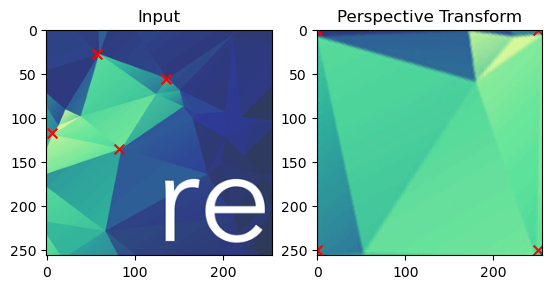

In [15]:
from matplotlib import pyplot as plt
import cv2 
import numpy as np

def Show(image, name, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    

image = cv2.imread('Data\icon.png', cv2.IMREAD_COLOR)
(w, h, c) = image.shape

pts1 = np.float32([[57, 27], [135, 55], [6, 117], [82, 135]])
pts2 = np.float32([[0, 0], [0, 250], [250, 0], [250, 250]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(image, M, (w, h))
# Hình vẽ có 1 hàng 2 cột, vẽ ở vị trí thứ 1
plt.subplot(121), Show(image,"Input")
for (x, y) in pts1:
  plt.scatter(x, y, s=50, c='red', marker='x')
# Hình vẽ có 1 hàng 2 cột, vẽ ở vị trí thứ 2
plt.subplot(122), Show(dst, "Perspective Transform")
for (x, y) in pts2:
  plt.scatter(x, y, s=50, c='red', marker='x')
plt.show()
